In [60]:
from pathlib import Path
import pytesseract
from PIL import Image

from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [19]:
test_text = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5"""
input_text = Path("input.txt").read_text()

In [3]:
def make_arr(text):
    coords = text.split("\n\n")[0]
    coords = np.array([[int(i) for i in row.split(",")] for row in coords.split("\n")])

    dots = np.zeros((coords[:, 0].max() + 1, coords[:, 1].max() + 1), dtype=int)

    for x, y in coords:
        dots[x, y] = 1

    return dots

In [38]:
def fold(dots, cmd):

    dim, loc = cmd.split("=")
    loc = int(loc)

    if dim == "y":
        new_dots = dots[:, :loc] + dots[:, -1 : -(loc + 1) : -1]

    if dim == "x":
        new_dots = dots[:loc, :] + dots[-1 : -(loc + 1) : -1, :]

    return (new_dots >= 1).astype(int)

In [43]:
def make_folds(text, lim=None):

    dots = make_arr(text)

    fold_instructions = text.split("\n\n")[1]
    for row in fold_instructions.split("\n")[:lim]:
        fold_cmd = row.split(" ")[-1]
        dots = fold(dots, fold_cmd)

    return dots

In [44]:
make_folds(test_text, lim=1)

array([[1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0]])

In [45]:
np.sum(make_folds(test_text, lim=1))

17

In [46]:
make_folds(input_text, lim=1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
np.sum(make_folds(input_text, lim=1))

724

In [48]:
make_folds(test_text)

array([[1, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0]])

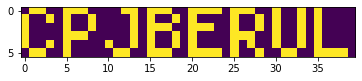

In [53]:
plt.imshow( make_folds(input_text).T)

In [77]:
im_arr = np.pad(make_folds(input_text).T, pad_width=30, mode="constant", constant_values=0)

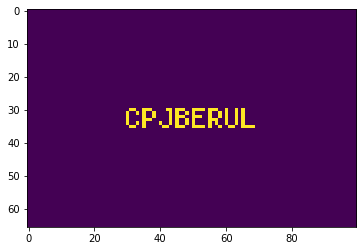

In [78]:
plt.imshow(im_arr)

In [79]:
im = Image.fromarray(np.uint8(cm.gist_yarg(im_arr)*255))

In [80]:
pytesseract.image_to_string(im, )

''